In [2]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules

In [4]:
df=pd.read_csv('Order1.csv')
df.head(5)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [5]:
transaction=df.groupby(['Member_number','Date'])['itemDescription'].apply(list).tolist()

In [6]:
transaction

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['sausage', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'hygiene articles'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['root vegetables', 'whole milk'

In [10]:
encode=TransactionEncoder()
x=encode.fit_transform(transaction)
df=pd.DataFrame(x,columns=encode.columns_)

In [11]:
freq_item=apriori(df,min_support=0.01, use_colnames=True)
freq_item

,support,itemsets
0,0.021386,(UHT-milk)
1,0.033950,(beef)
2,0.021787,(berries)
3,0.016574,(beverages)
4,0.045312,(bottled beer)
...,...,...
64,0.010559,"(other vegetables, rolls/buns)"
65,0.014837,"(other vegetables, whole milk)"
66,0.013968,"(rolls/buns, whole milk)"
67,0.011629,"(whole milk, soda)"


In [13]:
rules=association_rules(freq_item,metric='confidence',min_threshold=0.03)

print(rules)

          antecedents         consequents  antecedent support  \
0  (other vegetables)        (rolls/buns)            0.122101   
1        (rolls/buns)  (other vegetables)            0.110005   
2  (other vegetables)        (whole milk)            0.122101   
3        (whole milk)  (other vegetables)            0.157923   
4        (rolls/buns)        (whole milk)            0.110005   
5        (whole milk)        (rolls/buns)            0.157923   
6        (whole milk)              (soda)            0.157923   
7              (soda)        (whole milk)            0.097106   
8            (yogurt)        (whole milk)            0.085879   
9        (whole milk)            (yogurt)            0.157923   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.110005  0.010559    0.086481  0.786154 -0.002872    0.974249   
1            0.122101  0.010559    0.095990  0.786154 -0.002872    0.971117   
2            0.157923  0.014837    0.121511  0.

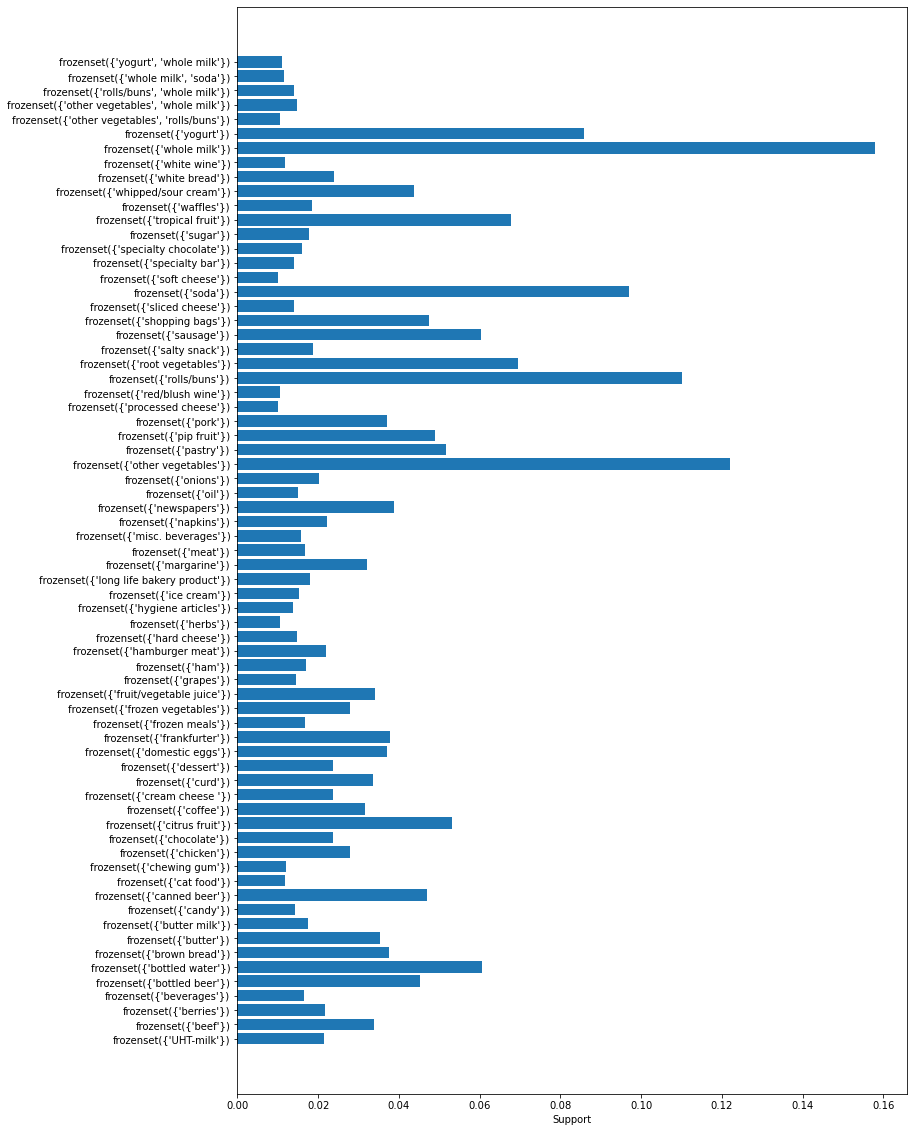

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=[12,20])
plt.barh(range(len(freq_item)),freq_item['support'])
plt.yticks(range(len(freq_item)),freq_item['itemsets'])
plt.xlabel('Support')
plt.show()